In [1]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import copy

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

import highlight_text
from highlight_text import HighlightText, ax_text, fig_text

from scipy.stats import f

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def get_r2(X, y):
    if len(X.shape)<2:
        r2 = LinearRegression().fit(StandardScaler().fit_transform(X.values.reshape(-1, 1)), y).score(StandardScaler().fit_transform(X.values.reshape(-1, 1)), y)
    else:
        r2 = LinearRegression().fit(StandardScaler().fit_transform(X.values), y).score(StandardScaler().fit_transform(X.values), y)
    return r2

In [2]:
df = pd.read_csv('/media/data/HCPAging/data/MLTablesMultCon/output_5cv_sexAdj_noStdTarg_STDstackFeatures/commonality_cog_fluid.csv', 
                 index_col=0)
df_age = pd.read_csv('/media/data/HCPAging/data/MLTablesMultCon/output_5cv_sexAdj_noStdTarg_STDstackFeatures/output_5cv_sexAdj_noStdTarg_STDstackFeatures_interview_age/all_fold_y-pred_y-obs.csv', 
                     index_col=0)
df_cog = pd.read_csv('/media/data/HCPAging/data/MLTablesMultCon/output_5cv_sexAdj_noStdTarg_STDstackFeatures/output_5cv_sexAdj_noStdTarg_STDstackFeatures_nih_fluidcogcomp_unadjusted/all_fold_y-pred_y-obs.csv', 
                     index_col=0)
df_age_orig_r2 = pd.read_csv('/media/data/HCPAging/data/MLTablesMultCon/output_5cv_sexAdj_noStdTarg_STDstackFeatures/r2_cor_ageorig_cogorig.csv', 
                             index_col=0)['fluid']


In [3]:
new_labels = ['CARIT: NoGo-Go',
'CARIT: Go',
'CARIT: NoGo',
'FACENAME: Encoding',
'FACENAME: Recall',
'FACENAME: Distractor',
'FACENAME: Encoding-Recall',
'FACENAME: Encoding-Distractor',
'FACENAME: Recall-Distractor',
'VISMOTOR: Vismotor',
'CARIT: FC',
'FACE-NAME: FC',
'VISUAL MOTOR: FC',
'Cortical Thickness',
'Cortical Surface',
'Subcortical Volume',
'Total Brain Volume',
'Resting State FC',
'Stacked: All',
'Stacked: Task Contrast',
'Stacked: Non Task',
'Stacked: Task FC',
'Stacked: Task Contrast & FC',
'Stacked: All excluding Task FC', #set6  with Task GLM
'Stacked: All excluding Task Contrast',  #set7 with Task FC
'Stacked: Resting and Task FC']


In [4]:
df.index=new_labels

new_labels.append('y_real')
new_labels.append('fold')
df_age.columns = new_labels
df_cog.columns = new_labels

In [5]:
df_age_orig_r2['r2']

0.3207318510558264

In [6]:
df.columns

Index(['r2_COG_brain', 'r2_AGE_brain', 'r2_1_age_pred', 'r2_1_age_gap',
       'r2_1_age_pred_cor', 'r2_1_age_gap_cor', 'r2_2_age_pred+age-orig',
       'r2_2_age_gap+age-orig', 'r2_2_age_pred_cor+age-orig',
       'r2_2_age_gap_cor+age-orig', 'U_2_age_pred', 'U_2_age_gap',
       'U_2_age_pred_cor', 'U_2_age_gap_cor', 'U_2_age-orig_(age_pred)',
       'U_2_age-orig_(age_gap)', 'U_2_age-orig_(age_pred_cor)',
       'U_2_age-orig_(age_gap_cor)', 'C_2_age_pred+age-orig',
       'C_2_age_gap+age-orig', 'C_2_age_pred_cor+age-orig',
       'C_2_age_gap_cor+age-orig', 'r2_3_2_age-orig+cog-pred',
       'r2_3_2_age_pred+cog-pred', 'r2_3_2_age_gap+cog-pred',
       'r2_3_2_age_pred_cor+cog-pred', 'r2_3_2_age_gap_cor+cog-pred',
       'r2_3_age_pred+age+cog-pred', 'r2_3_age_gap+age+cog-pred',
       'r2_3_age_pred_cor+age+cog-pred', 'r2_3_age_gap_cor+age+cog-pred',
       'U_3_age_pred', 'U_3_age_gap', 'U_3_age_pred_cor', 'U_3_age_gap_cor',
       'U_3_age-orig_(age_pred)', 'U_3_age-orig_(age_g

In [7]:
df.index

Index(['CARIT: NoGo-Go', 'CARIT: Go', 'CARIT: NoGo', 'FACENAME: Encoding',
       'FACENAME: Recall', 'FACENAME: Distractor', 'FACENAME: Encoding-Recall',
       'FACENAME: Encoding-Distractor', 'FACENAME: Recall-Distractor',
       'VISMOTOR: Vismotor', 'CARIT: FC', 'FACE-NAME: FC', 'VISUAL MOTOR: FC',
       'Cortical Thickness', 'Cortical Surface', 'Subcortical Volume',
       'Total Brain Volume', 'Resting State FC', 'Stacked: All',
       'Stacked: Task Contrast', 'Stacked: Non Task', 'Stacked: Task FC',
       'Stacked: Task Contrast & FC', 'Stacked: All excluding Task FC',
       'Stacked: All excluding Task Contrast', 'Stacked: Resting and Task FC'],
      dtype='object')

In [8]:
df[['r2_2_age_pred+age-orig', 'r2_2_age_gap+age-orig', 'r2_2_age_pred_cor+age-orig',
       'r2_2_age_gap_cor+age-orig']]#.mean()

vecvec = pd.Series()
for col in ['r2_2_age_pred+age-orig', 'r2_2_age_gap+age-orig', 'r2_2_age_pred_cor+age-orig',
            'r2_2_age_gap_cor+age-orig']:
    vecvec = pd.concat([vecvec, df[col]], axis=0, ignore_index=True)
    

/home/narunlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [9]:
#average r2 for all modalities for all brain age indexes
#for 2 features model
vecvec.mean()

0.32638579263869616

In [10]:
#st dev r2 for all modalities for all brain age indexes
#for 2 features model
vecvec.std()

0.005081556583345616

In [11]:
df[['r2_3_age_pred+age+cog-pred', 'r2_3_age_gap+age+cog-pred',
       'r2_3_age_pred_cor+age+cog-pred', 'r2_3_age_gap_cor+age+cog-pred']]#.mean()

vecvec = pd.Series()
for col in ['r2_3_age_pred+age+cog-pred', 'r2_3_age_gap+age+cog-pred',
            'r2_3_age_pred_cor+age+cog-pred', 'r2_3_age_gap_cor+age+cog-pred']:
    vecvec = pd.concat([vecvec, df[col]], axis=0, ignore_index=True)
    

/home/narunlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [12]:
#average r2 for all modalities for all brain age indexes
#for 3 features model
vecvec.mean()

0.3849923696765244

In [13]:
#average r2 for all modalities for all brain age indexes
#for 3 features model
vecvec.std()

0.04233141223752917

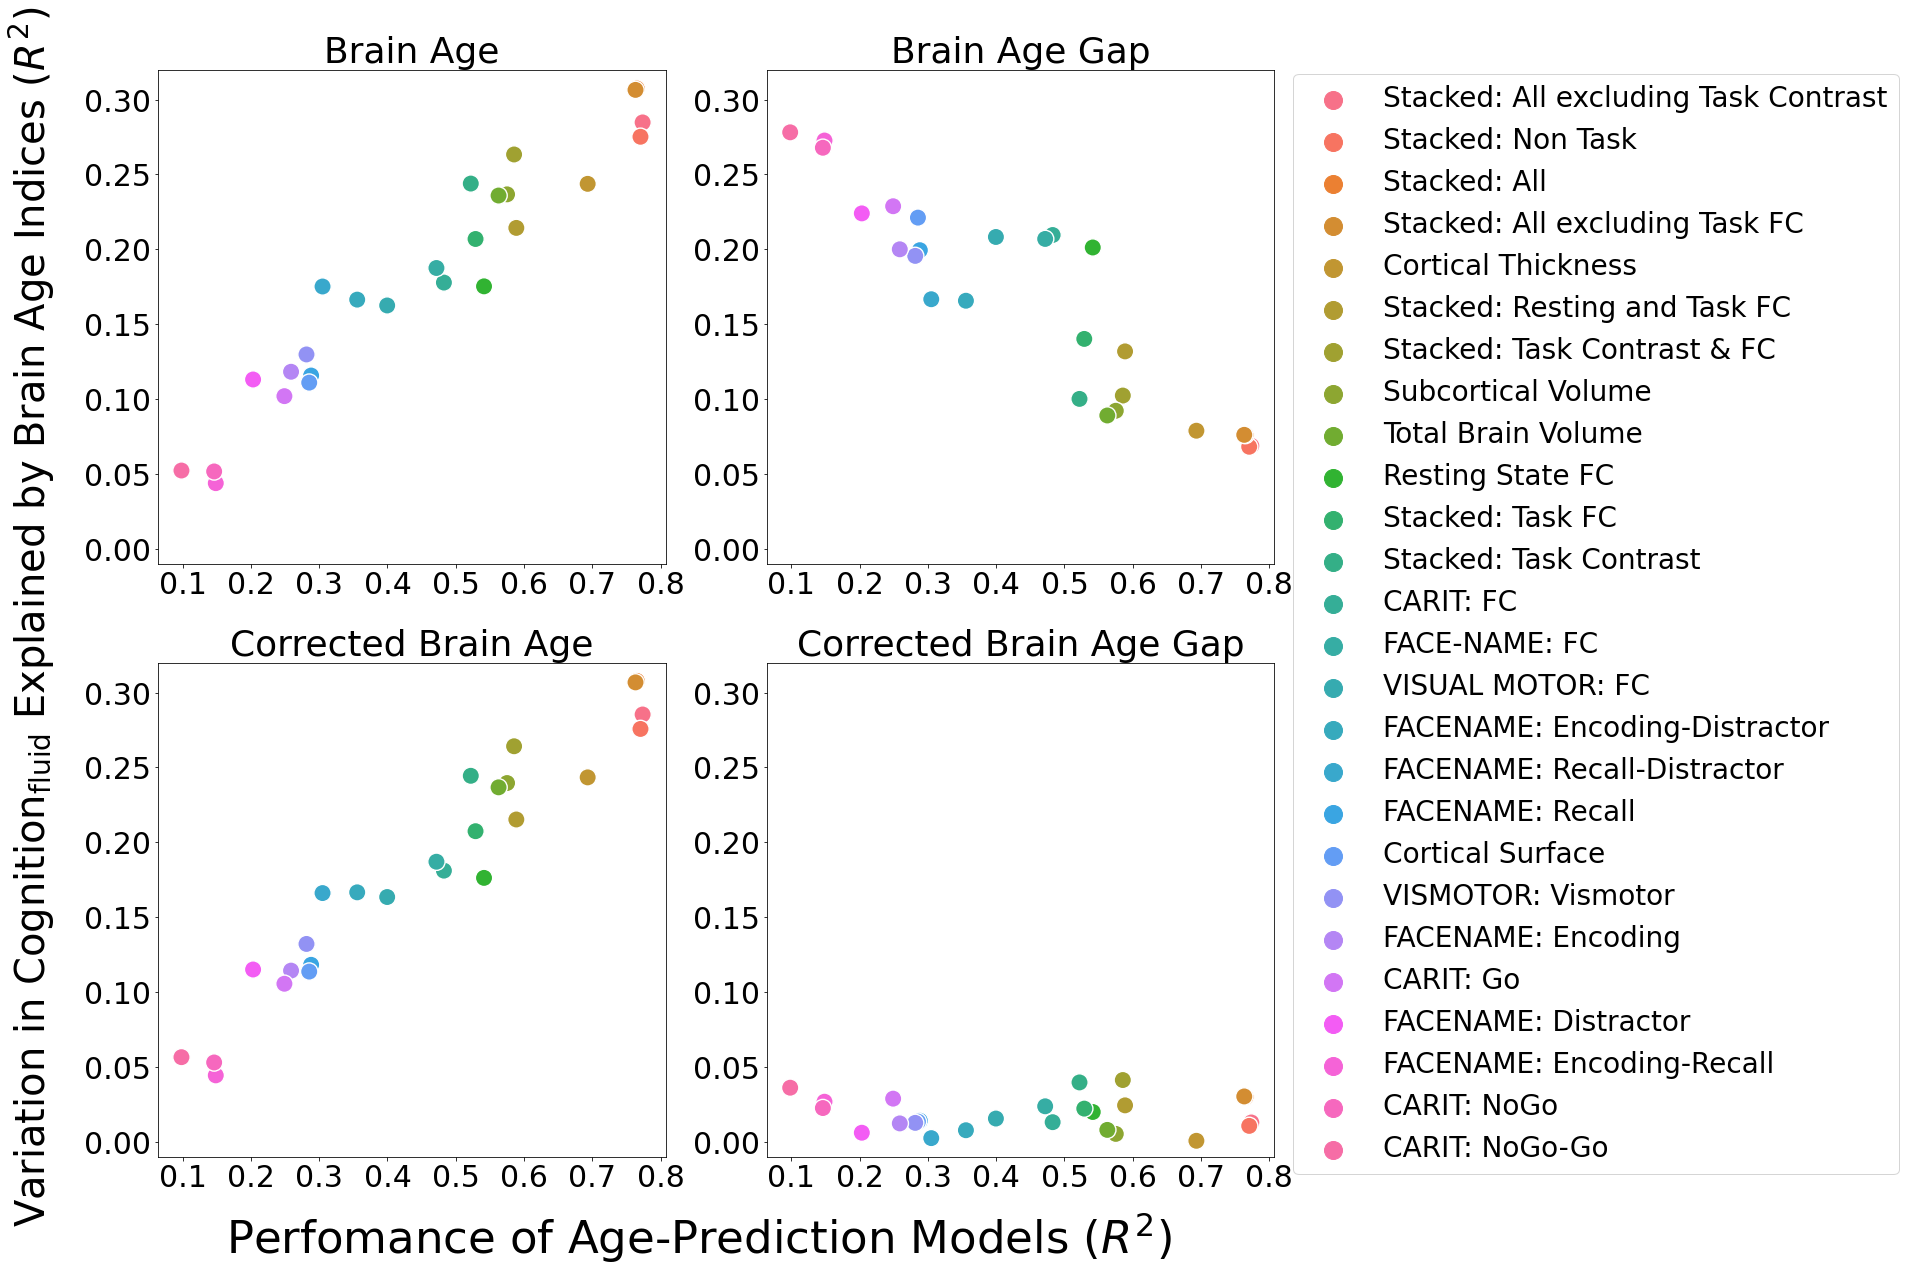

In [15]:
fig = plt.figure(figsize=(20,20))


data = df.reset_index().sort_values(by='r2_AGE_brain', ascending=False)


for col, header, num in zip(['r2_1_age_pred', 'r2_1_age_gap', 'r2_1_age_pred_cor', 'r2_1_age_gap_cor'], 
                            ['Brain Age', 'Brain Age Gap', 'Corrected Brain Age', 'Corrected Brain Age Gap'], 
                            [1, 2, 3, 4]):
    
    plt.subplot(2, 2, num)
    plt.title(header, fontsize=36)

    ax = sns.scatterplot(data =data, x = 'r2_AGE_brain', y = col, hue = 'index', s=300)

    plt.xlabel(' ')
    plt.ylabel(' ')

    plt.xticks( fontsize=30)
    plt.yticks( fontsize=30)
    
    plt.ylim((-0.01,0.32))
    if num == 2:
        ax.legend(bbox_to_anchor=(1.01, 1.02), markerscale=3, fontsize=28)
    else:
        ax.legend([],[], frameon=False)

#ax.legend(bbox_to_anchor=(1.01, 1.02), markerscale=2, fontsize=14)

fig.supxlabel('Perfomance of Age-Prediction Models ($R^2$)',fontsize=45, y=0.05)
fig.supylabel('Variation in $\mathregular{Cognition_{fluid}}$ Explained by Brain Age Indices ($R^2$)',fontsize=40)

plt.show()

In [16]:
#maximum for Corrected Brain Age Gap
df['r2_1_age_gap_cor'].max()

0.0412613996340697

In [17]:
df['r2_1_age_gap_cor'].sort_values()

Cortical Thickness                      0.000693
FACENAME: Recall-Distractor             0.002471
Subcortical Volume                      0.005298
FACENAME: Distractor                    0.006080
FACENAME: Encoding-Distractor           0.007732
Total Brain Volume                      0.007968
Stacked: Non Task                       0.010646
FACENAME: Encoding                      0.012302
VISMOTOR: Vismotor                      0.012664
Stacked: All excluding Task Contrast    0.012918
CARIT: FC                               0.013119
Cortical Surface                        0.013491
FACENAME: Recall                        0.014101
VISUAL MOTOR: FC                        0.015543
Resting State FC                        0.019923
Stacked: Task FC                        0.022173
CARIT: NoGo                             0.022561
FACE-NAME: FC                           0.023722
Stacked: Resting and Task FC            0.024354
FACENAME: Encoding-Recall               0.026787
CARIT: Go           

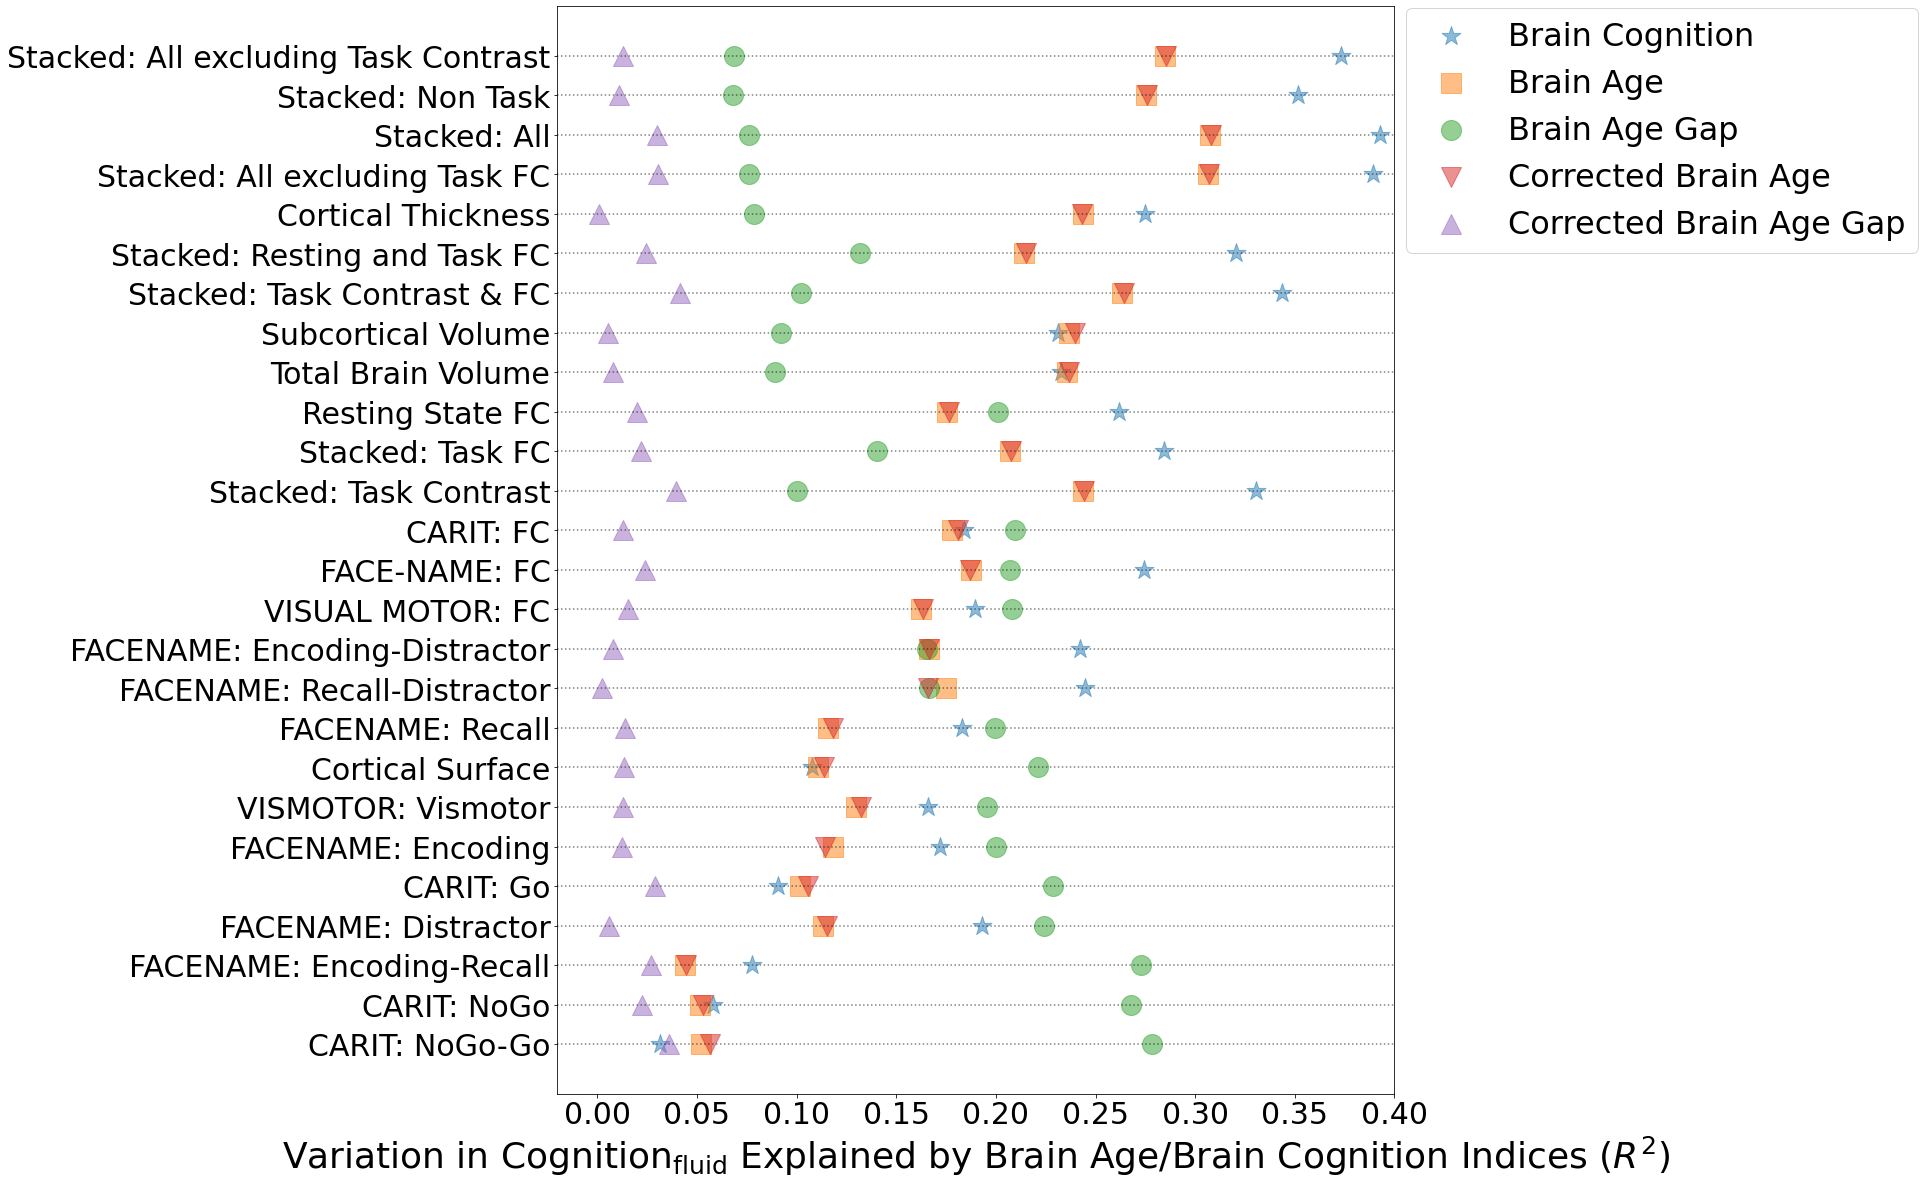

In [20]:
df_scatter = df[['r2_AGE_brain',
                 'r2_COG_brain', 
                 'r2_1_age_pred', 
                 'r2_1_age_gap', 
                 'r2_1_age_pred_cor', 
                 'r2_1_age_gap_cor']]

df_scatter = df_scatter.sort_values(by='r2_AGE_brain', ascending=True).reset_index()


fig = plt.figure(figsize=(15,20))

for col, labl, marker in zip(df_scatter.columns[2:], ['Brain Cognition', 
                                              'Brain Age', 
                                              'Brain Age Gap', 
                                              'Corrected Brain Age', 
                                              'Corrected Brain Age Gap'], ["*" , "," , "o" , "v" , "^" ]):
  
    plt.scatter(data=df_scatter, y='index', x = col, label=labl, s=400, alpha=.5, marker=marker)

for j in np.arange(0, len(df_scatter.index), 1):
    plt.hlines(y=j, xmin=-0.02, xmax=0.4, linestyles='dotted', color='black', alpha=.5)


plt.xlim((-0.02,0.4))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Variation in $\mathregular{Cognition_{fluid}}$ Explained by Brain Age/Brain Cognition Indices ($R^2$)', fontsize=36)
fig.legend(bbox_to_anchor=(1.4, 0.89), fontsize=32)
plt.show()

In [21]:
df_scatter['index'].values[::-1]

array(['Stacked: All excluding Task Contrast', 'Stacked: Non Task',
       'Stacked: All', 'Stacked: All excluding Task FC',
       'Cortical Thickness', 'Stacked: Resting and Task FC',
       'Stacked: Task Contrast & FC', 'Subcortical Volume',
       'Total Brain Volume', 'Resting State FC', 'Stacked: Task FC',
       'Stacked: Task Contrast', 'CARIT: FC', 'FACE-NAME: FC',
       'VISUAL MOTOR: FC', 'FACENAME: Encoding-Distractor',
       'FACENAME: Recall-Distractor', 'FACENAME: Recall',
       'Cortical Surface', 'VISMOTOR: Vismotor', 'FACENAME: Encoding',
       'CARIT: Go', 'FACENAME: Distractor', 'FACENAME: Encoding-Recall',
       'CARIT: NoGo', 'CARIT: NoGo-Go'], dtype=object)

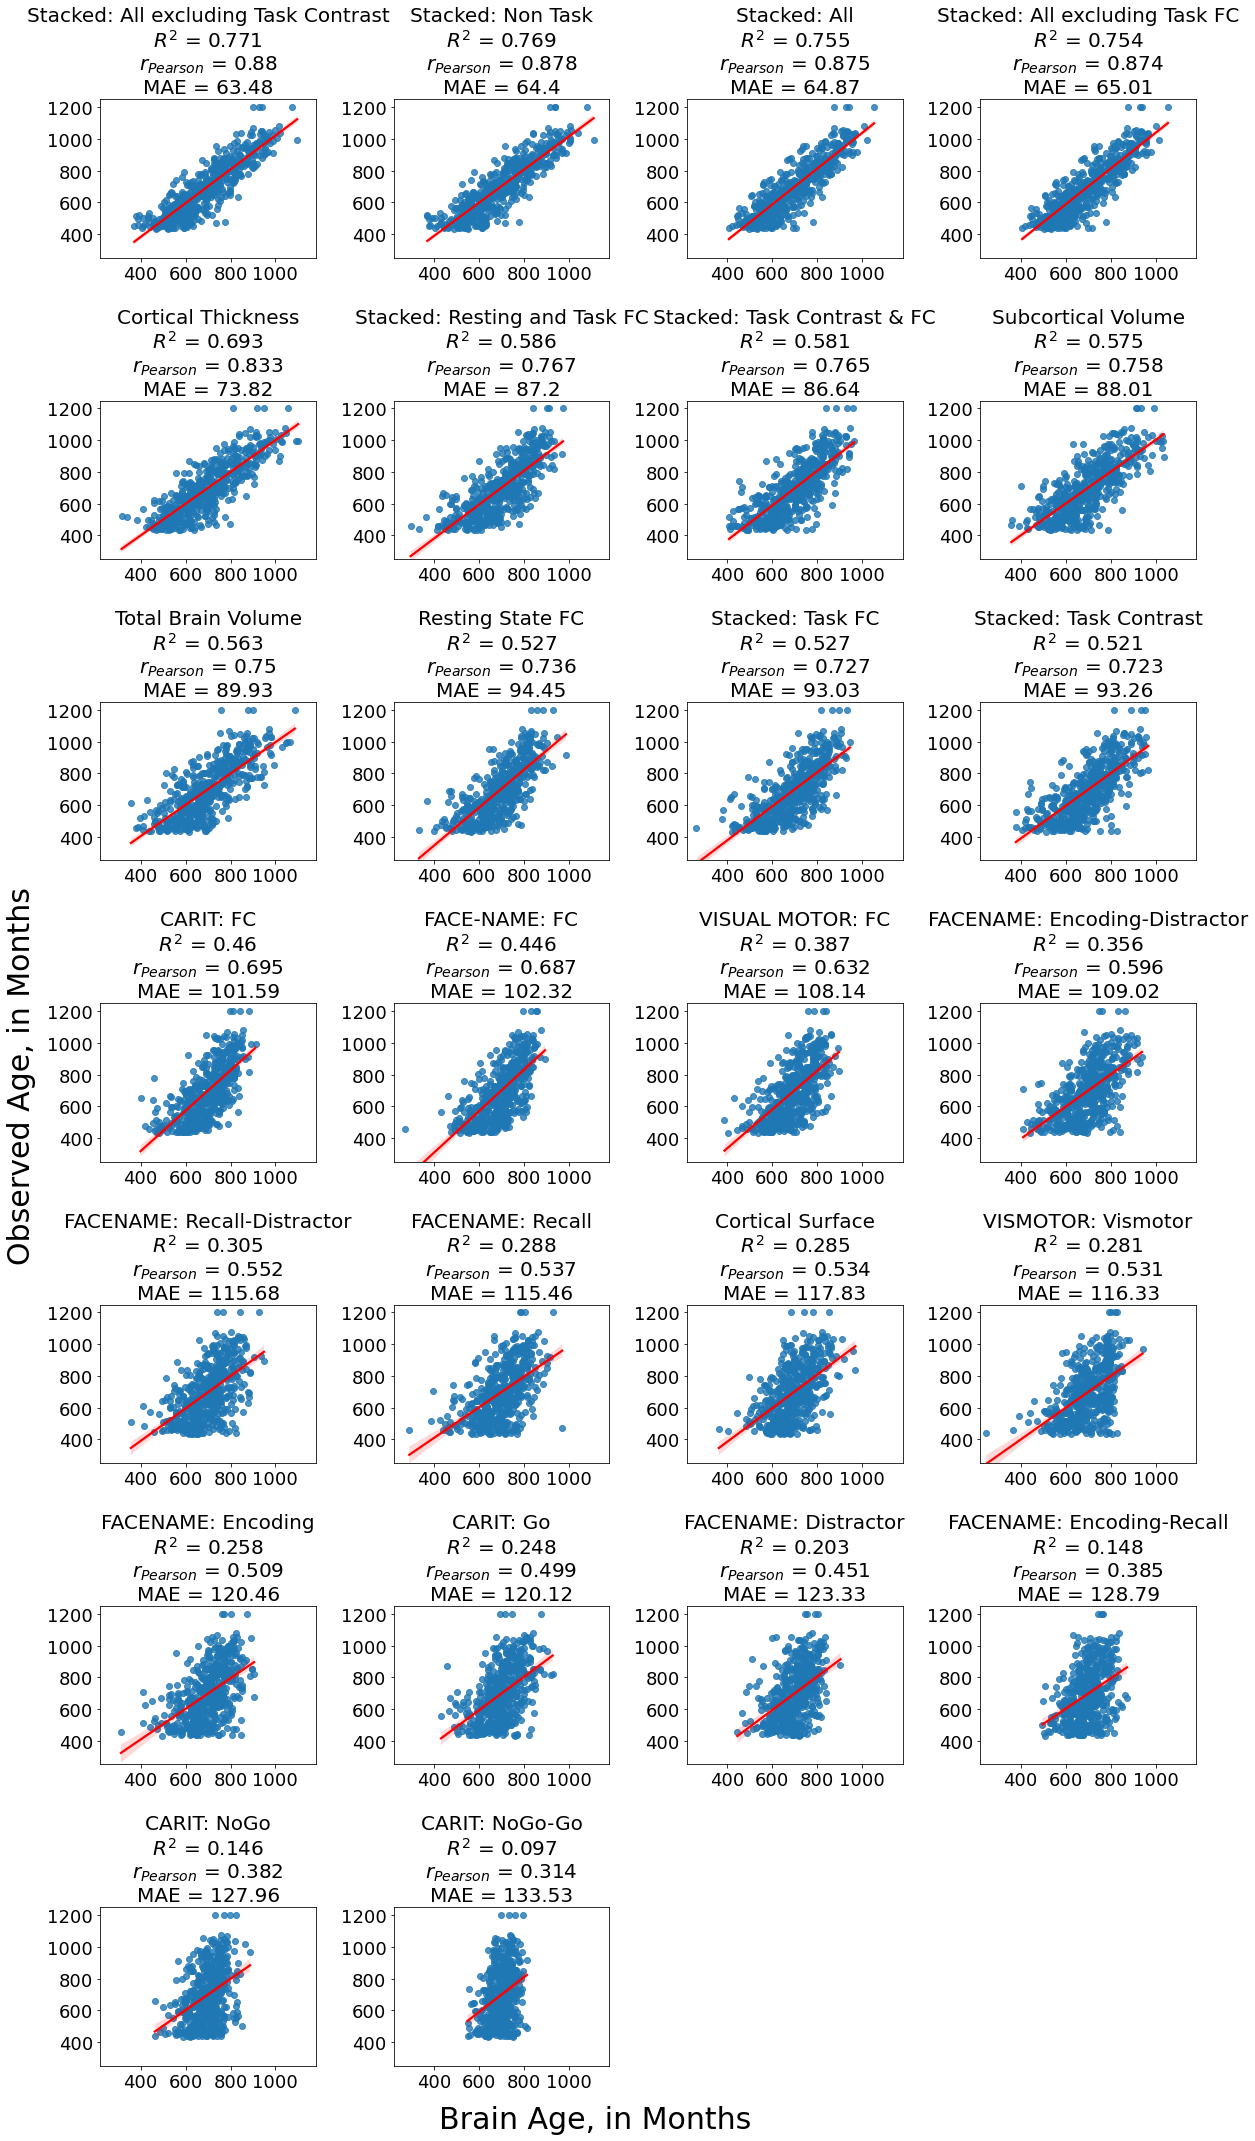

In [22]:
fig = plt.figure(figsize=(17,30))

data_age_scatter = df_age

for col, num in zip(df_scatter['index'].values[::-1], np.arange(1, len(df_age.columns[:-2])+1, 1) ):
    
    plt.subplot(7, 4, num)
    
    ind_r2 = r2_score(data_age_scatter['y_real'], data_age_scatter[col]).round(3)
    ind_mae = mean_absolute_error(data_age_scatter['y_real'], data_age_scatter[col]).round(2)
    ind_cor = pearsonr(data_age_scatter['y_real'], data_age_scatter[col])[0].round(3)

    
    plt.title(data_age_scatter[col].name+'\n$R^2$ = '+str(ind_r2)+'\n$r_{Pearson}$ = '+str(ind_cor)+'\nMAE = '+str(ind_mae)
              , fontsize=20)
    
    sns.regplot(data = data_age_scatter, y = 'y_real', x = col, line_kws={"color": "red"})
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim((220,1180))
    plt.ylim((250,1250))

fig.supxlabel('Brain Age, in Months', fontsize=30)    
fig.supylabel('Observed Age, in Months', fontsize=30)

fig.tight_layout()

plt.show()

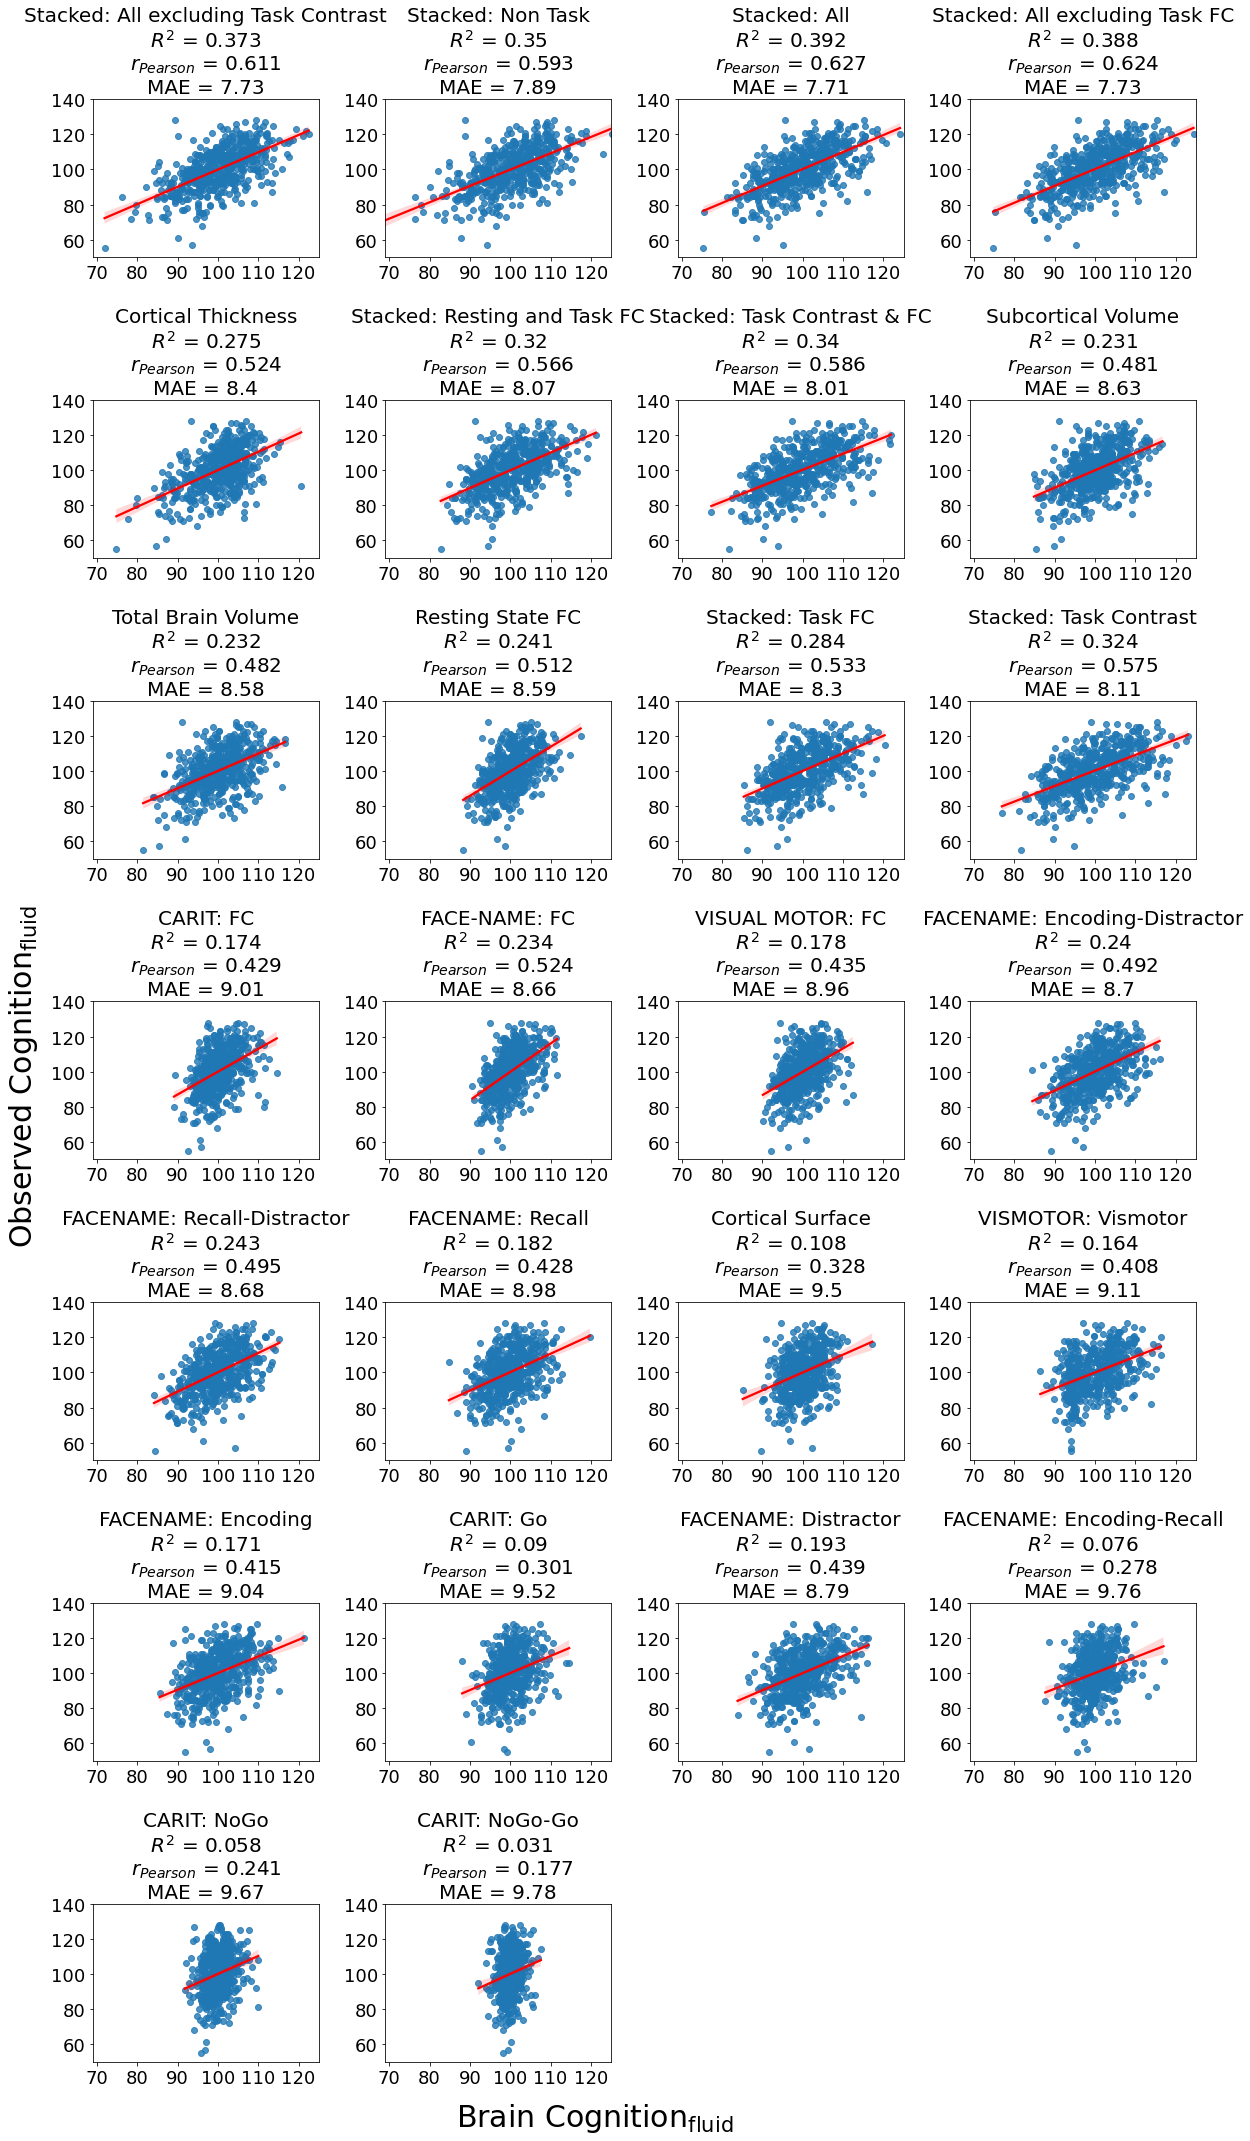

In [23]:
fig = plt.figure(figsize=(17,30))

data_cog_scatter = df_cog

for col, num in zip(df_scatter['index'].values[::-1], np.arange(1, len(df_cog.columns[:-2])+1, 1) ):
    
    plt.subplot(7, 4, num)
    
    ind_r2 = r2_score(data_cog_scatter['y_real'], data_cog_scatter[col]).round(3)
    ind_mae = mean_absolute_error(data_cog_scatter['y_real'], data_cog_scatter[col]).round(2)
    ind_cor = pearsonr(data_cog_scatter['y_real'], data_cog_scatter[col])[0].round(3)

    
    plt.title(data_cog_scatter[col].name+'\n$R^2$ = '+str(ind_r2)+'\n$r_{Pearson}$ = '+str(ind_cor)+'\nMAE = '+str(ind_mae)
              , fontsize=20)
    
    sns.regplot(data = data_cog_scatter, y = 'y_real', x = col, line_kws={"color": "red"})
    plt.xlabel(' ')
    plt.ylabel(' ')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlim((69,125))
    plt.ylim((50,140))

fig.supxlabel('Brain $\mathregular{Cognition_{fluid}}$', fontsize=30)    
fig.supylabel('Observed $\mathregular{Cognition_{fluid}}$', fontsize=30)

fig.tight_layout()

plt.show()

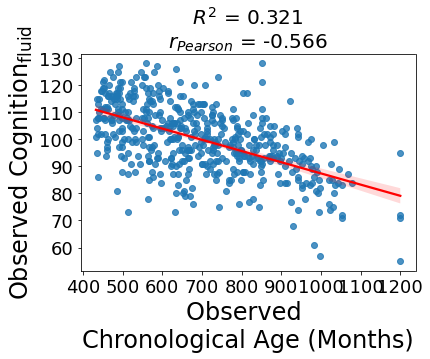

In [24]:
ind_r2 = get_r2(data_age_scatter['y_real'], data_cog_scatter['y_real']).round(3)
ind_cor = pearsonr(data_age_scatter['y_real'], data_cog_scatter['y_real'])[0].round(3)


plt.title('$R^2$ = '+str(ind_r2)+'\n$r_{Pearson}$ = '+str(ind_cor)
          , fontsize=20)

sns.regplot(x = data_age_scatter['y_real'], 
            y = data_cog_scatter['y_real'],  
            line_kws={"color": "red"})
plt.xlabel('Observed \nChronological Age (Months)', fontsize=24)
plt.ylabel('Observed $\mathregular{Cognition_{fluid}}$', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

In [25]:
r2_score(data_age_scatter['y_real'], data_cog_scatter['y_real'])

-12.18060209893785

In [26]:
r2_score(data_cog_scatter['y_real'], data_age_scatter['y_real'])

-2474.1614650190295

In [27]:
get_r2(data_age_scatter['y_real'], data_cog_scatter['y_real'])

0.32073185105582647

In [28]:
get_r2(data_cog_scatter['y_real'], data_age_scatter['y_real'])

0.3207318510558266

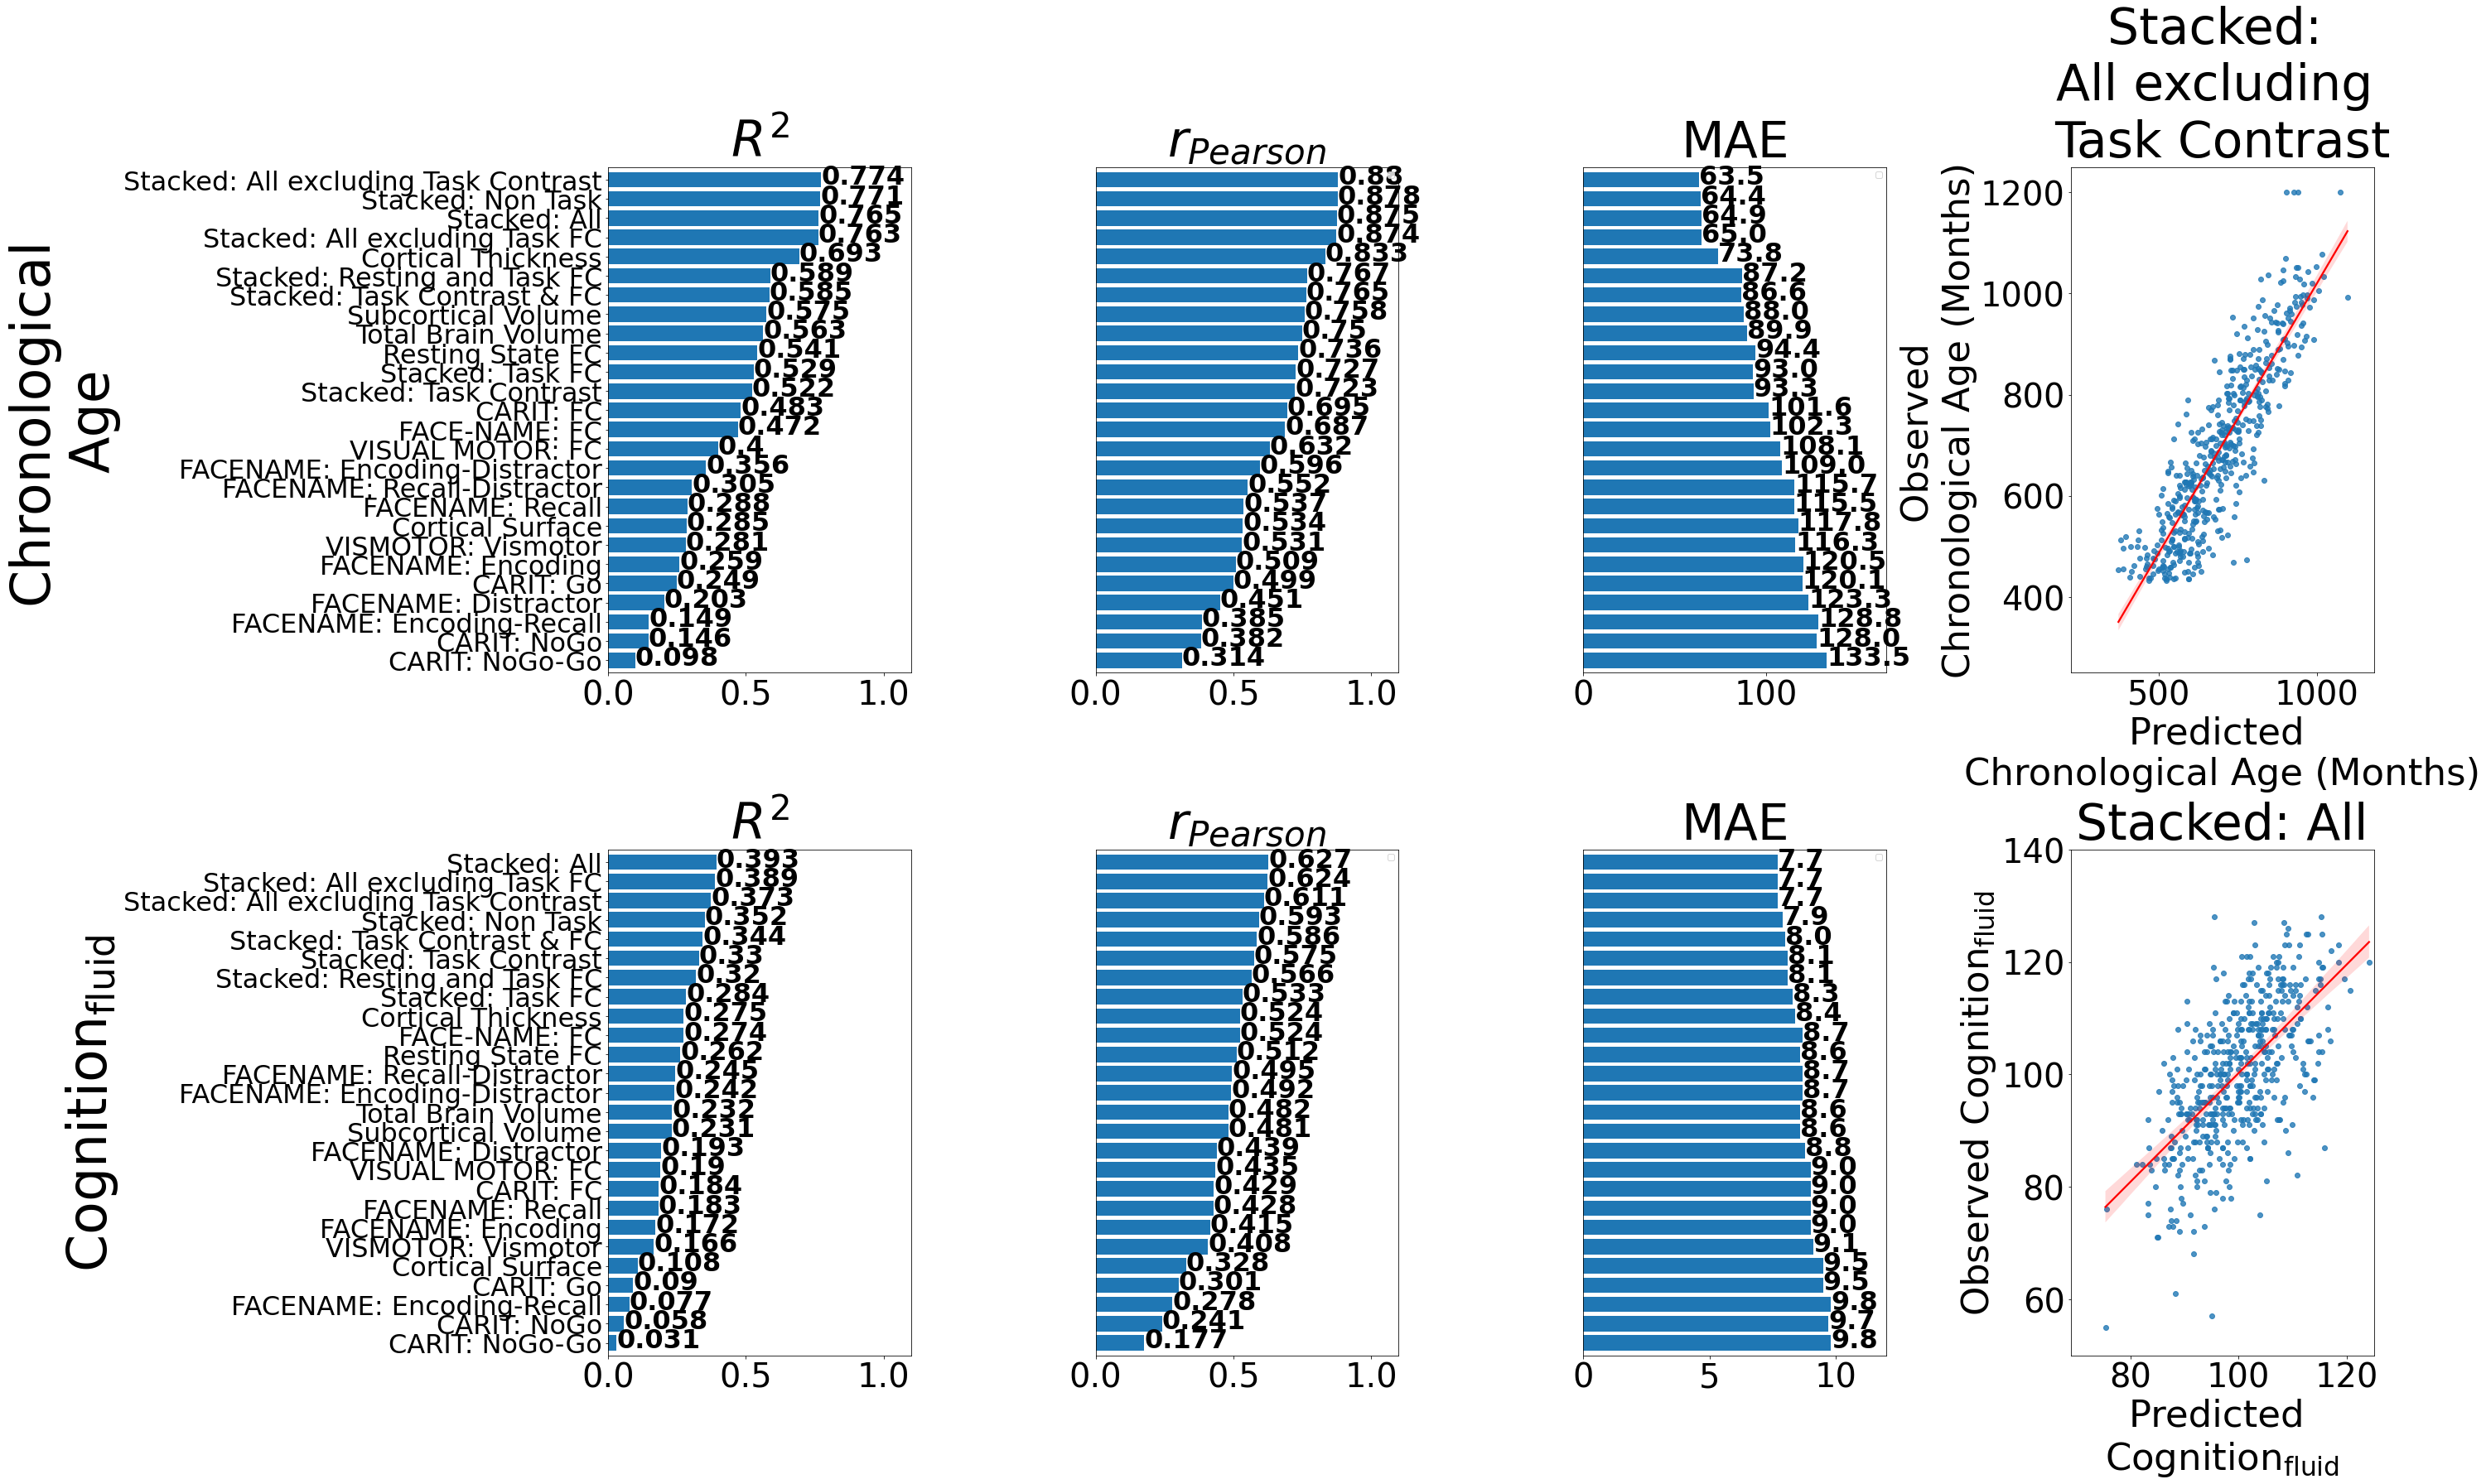

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=4)

fig.set_size_inches(40, 25)

#1, 5
for col, num, title in zip(['r2_AGE_brain', 'r2_COG_brain'], 
                           [0,1], 
                           ['Chronological\nAge', '$\mathregular{Cognition_{fluid}}$']):
    
    #r2 plot
    ax1 = df.loc[ : , col].sort_values(ascending=True).plot.barh(width=0.8, 
                                                                 fontsize=32,
                                                                 ax=axes[num,0])      
    for i in ax1.patches:

        ax1.text(i.get_x()+i.get_width(), i.get_y()+0.15,
                 str(round((i.get_width()), 3)),
                 fontsize=32, fontweight='bold')#,color=cc)
    ax1.set_xlim((0,1.1))
    ax1.set_title('$R^2$', fontsize=60)
    ax1.set_ylabel(title, fontsize=65,rotation=90) 
    ax1.tick_params(axis='x', labelsize=40)

#2-3, 6-7

j=0
for datafrm in [df_age, df_cog]:
    
    if j == 0:
        Col = 'r2_AGE_brain'
        num = 0
        title = 'Age'
    else:
        Col = 'r2_COG_brain'
        num = 1
        title = '$\mathregular{Cognition_{fluid}}$'        
    
    dct_cor = {}
    dct_mae = {}
    for col in datafrm.columns[:-2]:
        dct_cor[col] = pearsonr(datafrm['y_real'], datafrm[col])[0].round(3)
        dct_mae[col] = mean_absolute_error(datafrm['y_real'], datafrm[col]).round(1)

    df_fig_cor = pd.DataFrame({'R':dct_cor}).reindex(index=df.loc[ : , Col].sort_values(ascending=True).index)
    df_fig_mae = pd.DataFrame({'MAE':dct_mae}).reindex(index=df.loc[ : , Col].sort_values(ascending=True).index)
    
    #correlation plot
    ax2 = df_fig_cor.plot.barh(width=0.8,
                               fontsize=32,
                               ax=axes[num,1])
    for i in ax2.patches:

        ax2.text(i.get_x()+i.get_width(), i.get_y()+0.15,
                 str(round((i.get_width()), 3)),
                 fontsize=32, fontweight='bold')#, color=cc)    
    ax2.set_title('$r_{Pearson}$', fontsize=60)
    ax2.set_yticks([])
    ax2.set_xlim((0,1.1))
    ax2.legend([])
    ax2.tick_params(axis='x', labelsize=40)
    
    #mae plot
    ax3 = df_fig_mae.plot.barh(width=0.8,
                               fontsize=32,
                               ax=axes[num,2])
    for i in ax3.patches:

        ax3.text(i.get_x()+i.get_width(), i.get_y()+0.15,
                 str(round((i.get_width()), 3)),
                 fontsize=32, fontweight='bold')#,color=cc)
    ax3.set_title('MAE', fontsize=60)
    ax3.set_yticks([])
    ax3.legend([])
    if title == 'Age':
        ax3.set_xlim((0,166))
    else:
        ax3.set_xlim((0,12))
    ax3.tick_params(axis='x', labelsize=40)
    
    j+=1

#4, 8


ax4 = sns.regplot(data = df_age, y = 'y_real', x = 'Stacked: All excluding Task Contrast', 
                  line_kws={"color": "red"}, 
                  ax=axes[0,3])

ax4.set_xlabel('Predicted \nChronological Age (Months)', fontsize=45)
ax4.set_ylabel('Observed  \nChronological Age (Months)', fontsize=45)
ax4.tick_params(axis='x', labelsize=40)
ax4.tick_params(axis='y', labelsize=40)
ax4.set_xlim((220,1180))
ax4.set_ylim((250,1250))
ax4.set_title('Stacked: \nAll excluding \nTask Contrast', fontsize=60)


ax5 = sns.regplot(data = df_cog, y = 'y_real', x = 'Stacked: All', 
                  line_kws={"color": "red"}, 
                  ax=axes[1,3])

ax5.set_xlabel('Predicted \n$\mathregular{Cognition_{fluid}}$', fontsize=45)
ax5.set_ylabel('Observed $\mathregular{Cognition_{fluid}}$', fontsize=45)
ax5.tick_params(axis='x', labelsize=40)
ax5.tick_params(axis='y', labelsize=40)
ax5.set_xlim((69,125))
ax5.set_ylim((50,140))    
ax5.set_title('Stacked: All', fontsize=60)






fig.tight_layout()

plt.show()

In [30]:
df_r2 = df[['r2_2_age_pred+age-orig','r2_2_age_gap+age-orig', 
            'r2_2_age_pred_cor+age-orig', 'r2_2_age_gap_cor+age-orig',

            'r2_3_age_pred+age+cog-pred', 'r2_3_age_gap+age+cog-pred', 
            'r2_3_age_pred_cor+age+cog-pred', 'r2_3_age_gap_cor+age+cog-pred']]


In [31]:
dct_d_r2_12 = {}
for ttype in['age_pred', 'age_gap', 'age_pred_cor', 'age_gap_cor']:
    
    dctf = {}
    for ind in df_r2.index:

        N = len(df_age.index)
        k2 = 2
        Rchange = df_r2.loc[ind,'r2_2_'+ttype+'+age-orig'] - df_age_orig_r2['r2']
        kchange = 1
        R2_2 = df_r2.loc[ind,'r2_2_'+ttype+'+age-orig']

        F = ((N-k2-1)*Rchange ) / (kchange*(1 - R2_2))

        dctf[ind] = F
    dct_d_r2_12[ttype] = pd.Series(dctf)
df_d_r2_12 = pd.DataFrame(dct_d_r2_12)   

dfn= kchange
dfd = N-k2-1
pval1 = f.ppf(0.95, dfn, dfd)

In [32]:
print(pval1)

3.860086650062891


In [33]:
dct_d_r2_23 = {}
for ttype in['age_pred', 'age_gap', 'age_pred_cor', 'age_gap_cor']:

    dctf = {}
    for ind in df_r2.index:

        N = len(df_age.index)
        k2 = 3
        Rchange = df_r2.loc[ind,'r2_3_age_pred+age+cog-pred'] - df_r2.loc[ind,'r2_2_age_pred+age-orig']
        kchange = 1
        R2_2 = df_r2.loc[ind,'r2_3_age_pred+age+cog-pred']

        F = ((N-k2-1)*Rchange ) / (kchange*(1 - R2_2))

        dctf[ind] = F
    dct_d_r2_23[ttype] = pd.Series(dctf)
df_d_r2_23 = pd.DataFrame(dct_d_r2_23)    

dfn= kchange
dfd = N-k2-1
pval2 = f.ppf(0.95, dfn, dfd)

In [34]:
print(pval2)

3.8601240397378507


In [35]:
df_d_r2_12_nn = copy.deepcopy(df_d_r2_12)
df_d_r2_12_nn[df_d_r2_12_nn<pval1] =0
display(df_d_r2_12_nn)

age_pred    age_gap  age_pred_cor  \
CARIT: NoGo-Go                         0.000000   0.000000      0.000000   
CARIT: Go                              0.000000   0.000000      0.000000   
CARIT: NoGo                            0.000000   0.000000      0.000000   
FACENAME: Encoding                     0.000000   0.000000      0.000000   
FACENAME: Recall                       0.000000   0.000000      0.000000   
FACENAME: Distractor                   6.140506   6.140506      6.502772   
FACENAME: Encoding-Recall              0.000000   0.000000      0.000000   
FACENAME: Encoding-Distractor          5.697684   5.697684      5.184695   
FACENAME: Recall-Distractor           12.162875  12.162875      8.858510   
VISMOTOR: Vismotor                     0.000000   0.000000      0.000000   
CARIT: FC                              0.000000   0.000000      0.000000   
FACE-NAME: FC                          0.000000   0.000000      0.000000   
VISUAL MOTOR: FC                       0.000000   0.000000      0.000000   
Cortical Thickness                     0.000000   0.000000      0.000000   
Cortical Surface                       0.000000   0.000000      0.000000   
Subcortical Volume                     5.707028   5.707028      6.006066   
Total Brain Volume                     6.326913   6.326913      6.361315   
Resting State FC                       0.000000   0.000000      0.000000   
Stacked: All                          11.180305  11.180305     11.243055   
Stacked: Task Contrast                11.313509  11.313509     11.292598   
Stacked: Non Task                      0.000000   0.000000      0.000000   
Stacked: Task FC                       0.000000   0.000000      0.000000   
Stacked: Task Contrast & FC           11.598629  11.598629     11.635106   
Stacked: All excluding Task FC        11.009412  11.009412     11.036335   
Stacked: All excluding Task Contrast   4.130941   4.130941      4.188768   
Stacked: Resting and Task FC           0.000000   0.000000      0.000000   

                                      age_gap_cor  
CARIT: NoGo-Go                           0.000000  
CARIT: Go                                0.000000  
CARIT: NoGo                              0.000000  
FACENAME: Encoding                       0.000000  
FACENAME: Recall                         0.000000  
FACENAME: Distractor                     6.502772  
FACENAME: Encoding-Recall                0.000000  
FACENAME: Encoding-Distractor            5.184695  
FACENAME: Recall-Distractor              8.858510  
VISMOTOR: Vismotor                       0.000000  
CARIT: FC                                0.000000  
FACE-NAME: FC                            0.000000  
VISUAL MOTOR: FC                         0.000000  
Cortical Thickness                       0.000000  
Cortical Surface                         0.000000  
Subcortical Volume                       6.006066  
Total Brain Volume                       6.361315  
Resting State FC                         0.000000  
Stacked: All                            11.243055  
Stacked: Task Contrast                  11.292598  
Stacked: Non Task                        0.000000  
Stacked: Task FC                         0.000000  
Stacked: Task Contrast & FC             11.635106  
Stacked: All excluding Task FC          11.036335  
Stacked: All excluding Task Contrast     4.188768  
Stacked: Resting and Task FC             0.000000

In [36]:
df_d_r2_23_nn = copy.deepcopy(df_d_r2_23)
df_d_r2_23_nn[df_d_r2_23_nn<pval1] =0
display(df_d_r2_23_nn)

age_pred     age_gap  age_pred_cor  \
CARIT: NoGo-Go                          0.000000    0.000000      0.000000   
CARIT: Go                               5.718256    5.718256      5.718256   
CARIT: NoGo                             6.379045    6.379045      6.379045   
FACENAME: Encoding                     38.381131   38.381131     38.381131   
FACENAME: Recall                       49.253640   49.253640     49.253640   
FACENAME: Distractor                   58.564740   58.564740     58.564740   
FACENAME: Encoding-Recall              18.608392   18.608392     18.608392   
FACENAME: Encoding-Distractor          63.219520   63.219520     63.219520   
FACENAME: Recall-Distractor            60.199328   60.199328     60.199328   
VISMOTOR: Vismotor                     38.959788   38.959788     38.959788   
CARIT: FC                              12.411297   12.411297     12.411297   
FACE-NAME: FC                          72.974424   72.974424     72.974424   
VISUAL MOTOR: FC                       18.622197   18.622197     18.622197   
Cortical Thickness                     25.393088   25.393088     25.393088   
Cortical Surface                       12.229621   12.229621     12.229621   
Subcortical Volume                      6.755727    6.755727      6.755727   
Total Brain Volume                      0.000000    0.000000      0.000000   
Resting State FC                       81.060060   81.060060     81.060060   
Stacked: All                          108.344064  108.344064    108.344064   
Stacked: Task Contrast                 90.763799   90.763799     90.763799   
Stacked: Non Task                      73.471778   73.471778     73.471778   
Stacked: Task FC                       64.346576   64.346576     64.346576   
Stacked: Task Contrast & FC            94.016632   94.016632     94.016632   
Stacked: All excluding Task FC        104.452552  104.452552    104.452552   
Stacked: All excluding Task Contrast   87.293879   87.293879     87.293879   
Stacked: Resting and Task FC          101.610298  101.610298    101.610298   

                                      age_gap_cor  
CARIT: NoGo-Go                           0.000000  
CARIT: Go                                5.718256  
CARIT: NoGo                              6.379045  
FACENAME: Encoding                      38.381131  
FACENAME: Recall                        49.253640  
FACENAME: Distractor                    58.564740  
FACENAME: Encoding-Recall               18.608392  
FACENAME: Encoding-Distractor           63.219520  
FACENAME: Recall-Distractor             60.199328  
VISMOTOR: Vismotor                      38.959788  
CARIT: FC                               12.411297  
FACE-NAME: FC                           72.974424  
VISUAL MOTOR: FC                        18.622197  
Cortical Thickness                      25.393088  
Cortical Surface                        12.229621  
Subcortical Volume                       6.755727  
Total Brain Volume                       0.000000  
Resting State FC                        81.060060  
Stacked: All                           108.344064  
Stacked: Task Contrast                  90.763799  
Stacked: Non Task                       73.471778  
Stacked: Task FC                        64.346576  
Stacked: Task Contrast & FC             94.016632  
Stacked: All excluding Task FC         104.452552  
Stacked: All excluding Task Contrast    87.293879  
Stacked: Resting and Task FC           101.610298

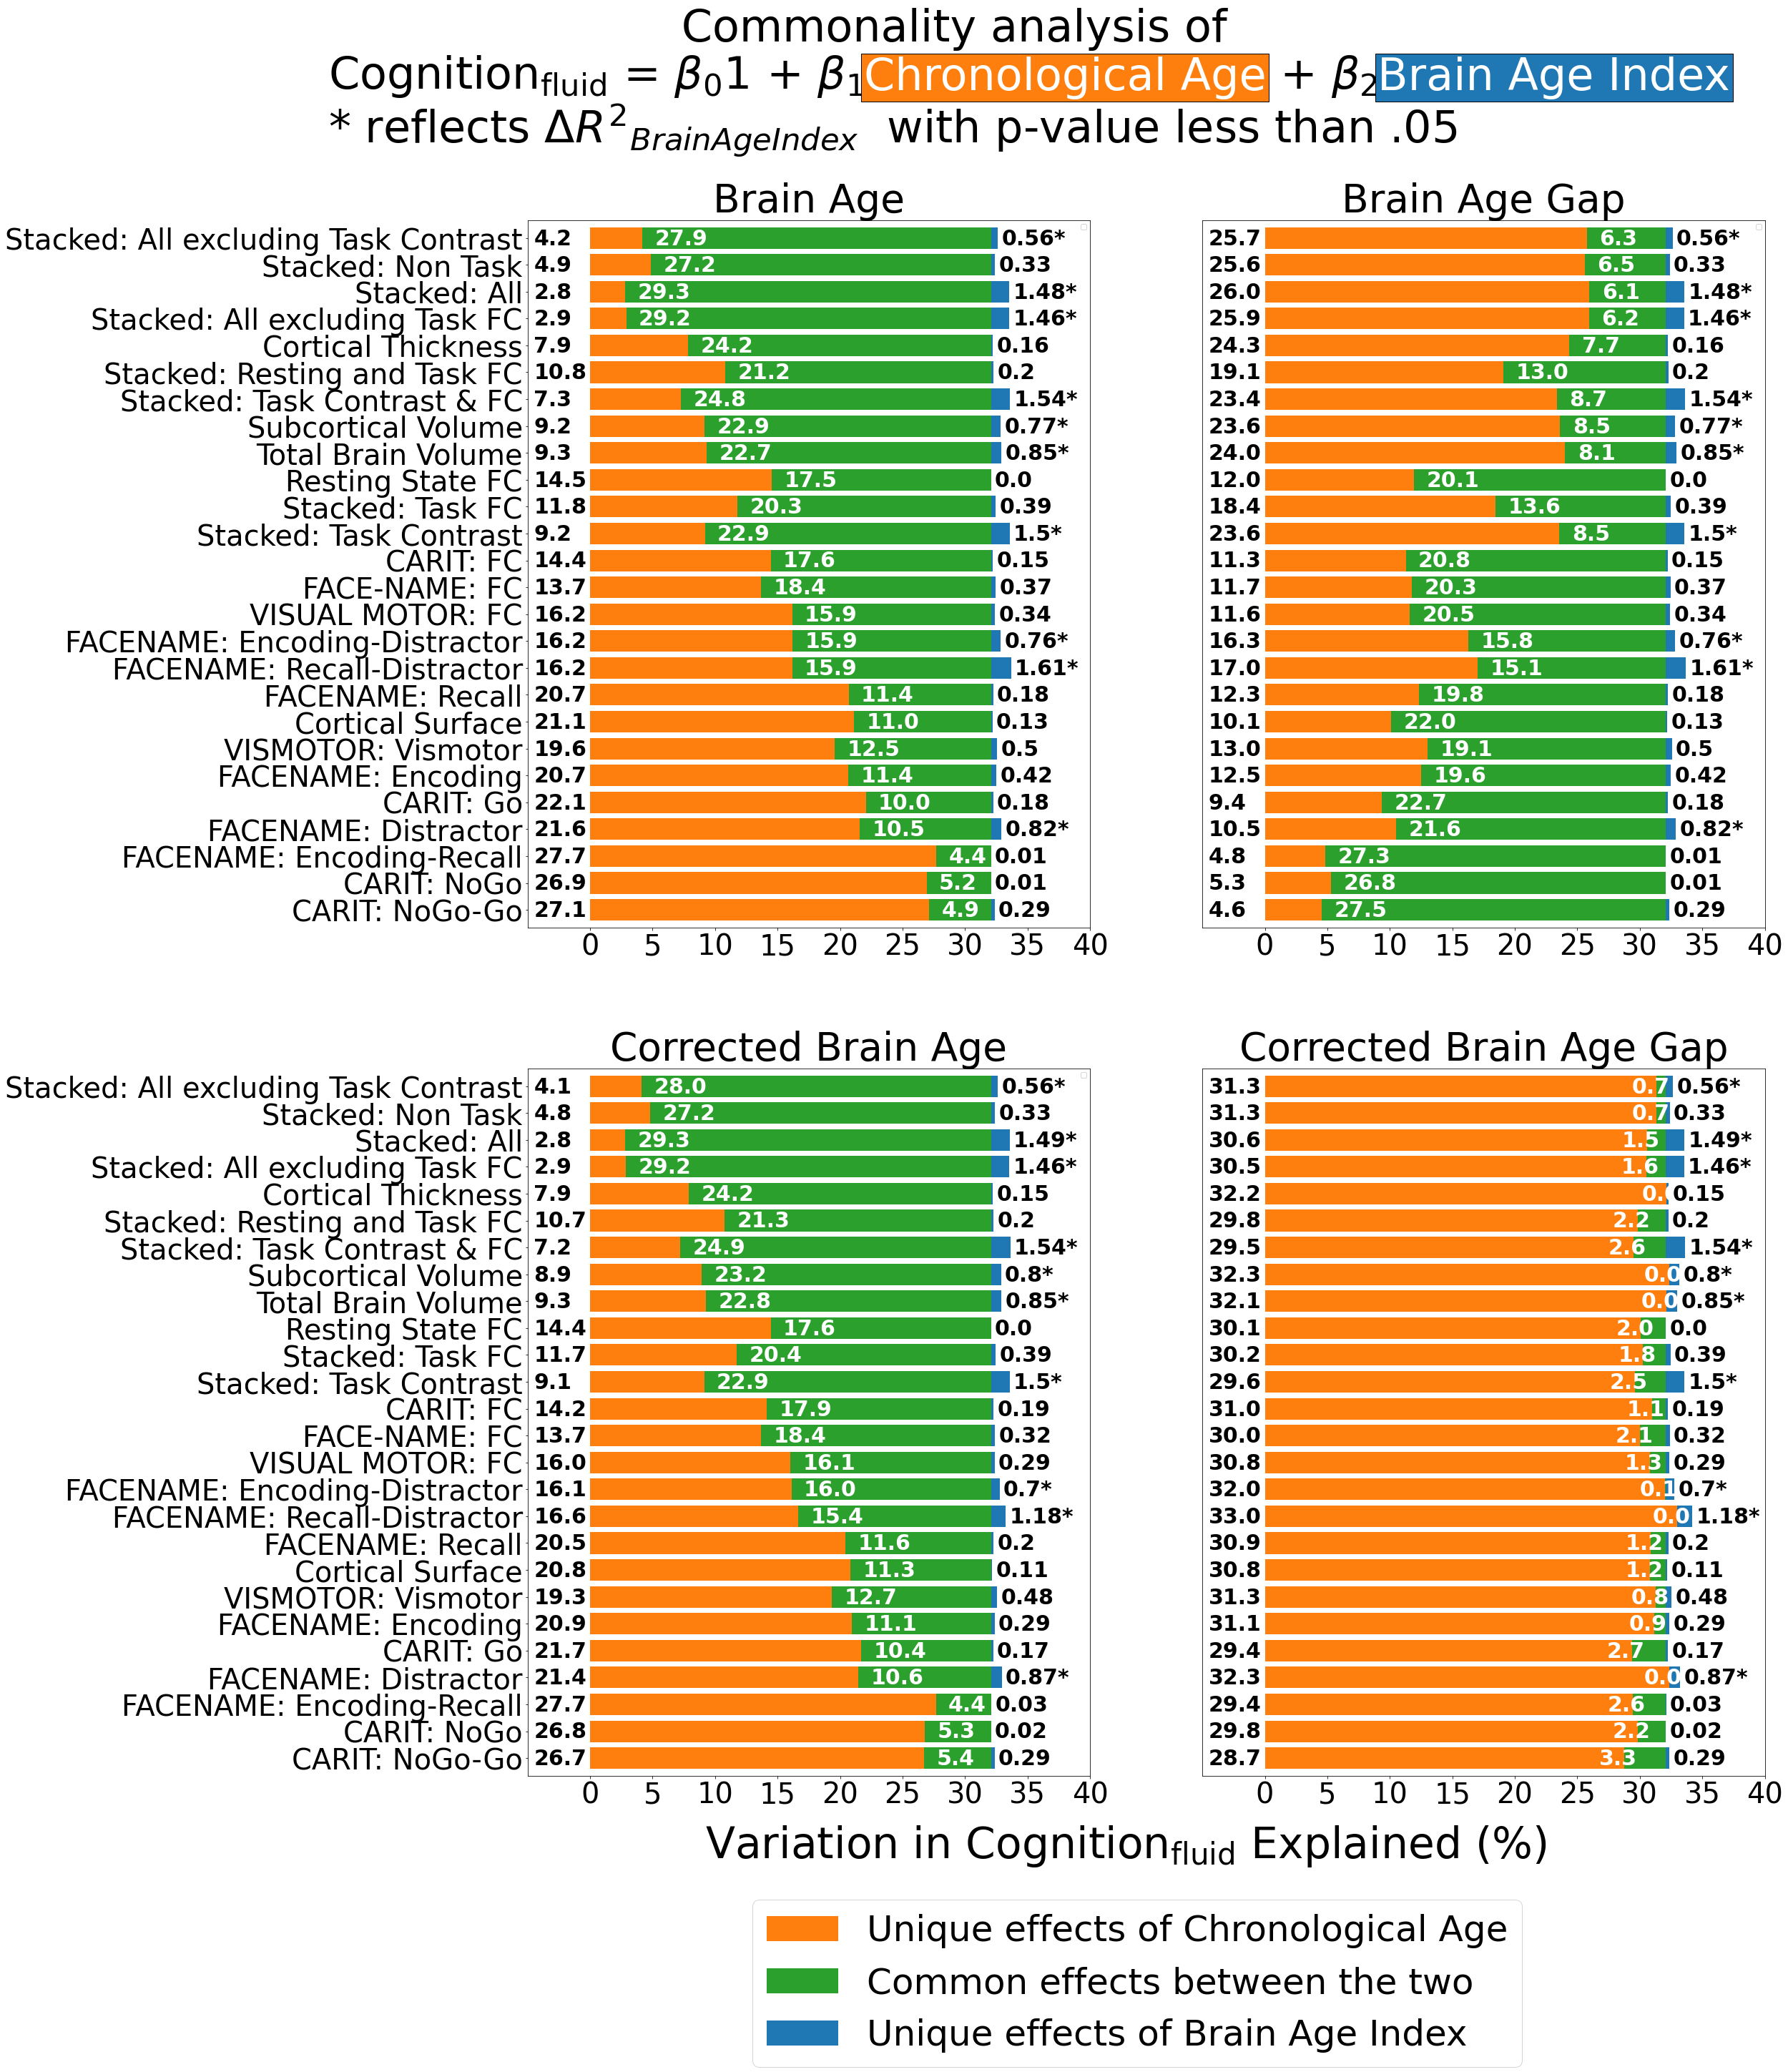

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2)

fig.set_size_inches(40, 40)

for ttype, num, title, num1, num2 in zip(['age_pred', 'age_gap', 'age_pred_cor', 'age_gap_cor'],
                      [0, 1, 2, 3],
                      ['Brain Age', 
                       'Brain Age Gap', 
                       'Corrected Brain Age', 
                       'Corrected Brain Age Gap'],
                        [0,0,1,1],
                        [0,1,0,1]):
    
    table  = df.loc[ df_scatter['index'].values, 
                    ['U_2_age-orig_('+ttype+')', 'C_2_'+ttype+'+age-orig','U_2_'+ttype, ]]
    
    table[table<0] = 0
    table = table*100
    
    table2 = df_d_r2_12_nn.reindex(index=table.index)

    
    ax1 = table.plot.barh(width=0.8,
                     stacked=True, 
                     figsize=(31,40), 
                     fontsize=40,
                     ax=axes[num1,num2], color=['#ff7f0e', '#2ca02c', '#1f77b4'])
    #set title
    ax1.set_title(title, fontsize=55)
    
    #set bar number text
    
    if num == 3:
        j=0
        coord = pd.Series(table2.index,
                          index=np.arange(52,52+len(ax1.patches[52:]),1))
        
        for i in ax1.patches:
            if j<26:
                xm = -4.5
                cc ='black'
                rnd = 1
                xtxt = str(round((i.get_width()), rnd))
            
            elif 26<=j<52:
                #xm =  i.get_x()-3
                cc ='white'
                rnd = 1
                xtxt = str(round((i.get_width()), rnd))
                if round((i.get_width()), rnd)==0.0:
                    xm = ax1.patches[j-26].get_x()+ax1.patches[j-26].get_width()-2
                else:
                    xm = i.get_x()-2
                    
            else:
                xm = i.get_x()+i.get_width()+0.3
                cc ='black'
                rnd = 2
                #xtxt = str(round((i.get_width()), rnd))
                if table2.loc[coord[j], ttype]!=0 :
                    xtxt = str(round((i.get_width()), rnd))+'*'    
                else:
                    xtxt = str(round((i.get_width()), rnd))
            

            ax1.text(xm, i.get_y()+0.15,
                     xtxt,
                     fontsize=30, fontweight='bold',
                     color=cc)
            j+=1
        
    else:
        j=0
        coord = pd.Series(table2.index,
                          index=np.arange(52,52+len(ax1.patches[52:]),1))
        for i in ax1.patches:
            if j<26:
                xm = -4.5
                cc ='black'
                rnd = 1
                xtxt = str(round((i.get_width()), rnd))
            elif 26<=j<52:
                xm = i.get_x()+1#
                cc ='white'
                rnd = 1 
                xtxt = str(round((i.get_width()), rnd))
            else:
                xm = i.get_x()+i.get_width()+0.3
                cc ='black'
                rnd = 2
                if table2.loc[coord[j], ttype]!=0 :
                    xtxt = str(round((i.get_width()), rnd))+'*'    
                else:
                    xtxt = str(round((i.get_width()), rnd))

            ax1.text(xm, i.get_y()+0.15,
                     xtxt,
                     fontsize=30, fontweight='bold',
                     color=cc)
            j+=1
    
    #set legend position
    if num ==3:
        ax1.legend(['Unique effects of Chronological Age', 'Common effects between the two', 'Unique effects of Brain Age Index'],
                   bbox_to_anchor=(0.6, -0.15), 
                   fontsize=50, ncol=1)  
    else:
        ax1.legend([])
    
    
    #set Y ticks 
    if num == 1:
        ax1.set_yticks([])
    elif num == 3:
        ax1.set_yticks([])
    
            
    ax1.set_xlim((-4.99,40))    
        
        
#fig.tight_layout()
#fig.suptitle('Commonality analysis of\n $Cognition_{fluid}$ = $\u03B2_{0}$1 + $\u03B2_{1}$Brain Age Index + $\u03B2_{2}$Age', 
#             fontsize=60)
sx = '                         Commonality analysis of\n$\mathregular{Cognition_{fluid}}$ = $\u03B2_{0}$1 + $\u03B2_{1}$<Chronological Age> + $\u03B2_{2}$<Brain Age Index>\n* reflects \u0394$R^2$$_{Brain Age Index}$  with p-value less than .05'

highlight_textprops = [{"bbox": {"facecolor": "#ff7f0e"}, "color":'w'}, 
                       {"bbox": {"facecolor": "#1f77b4"}, "color":'w'}]
fig_text(x=0, y=0.91, va='bottom', s=sx,  highlight_textprops= highlight_textprops, fontsize=62)

fig.supxlabel('Variation in $\mathregular{Cognition_{fluid}}$ Explained (%)', fontsize=60, y=0.08)

plt.show()

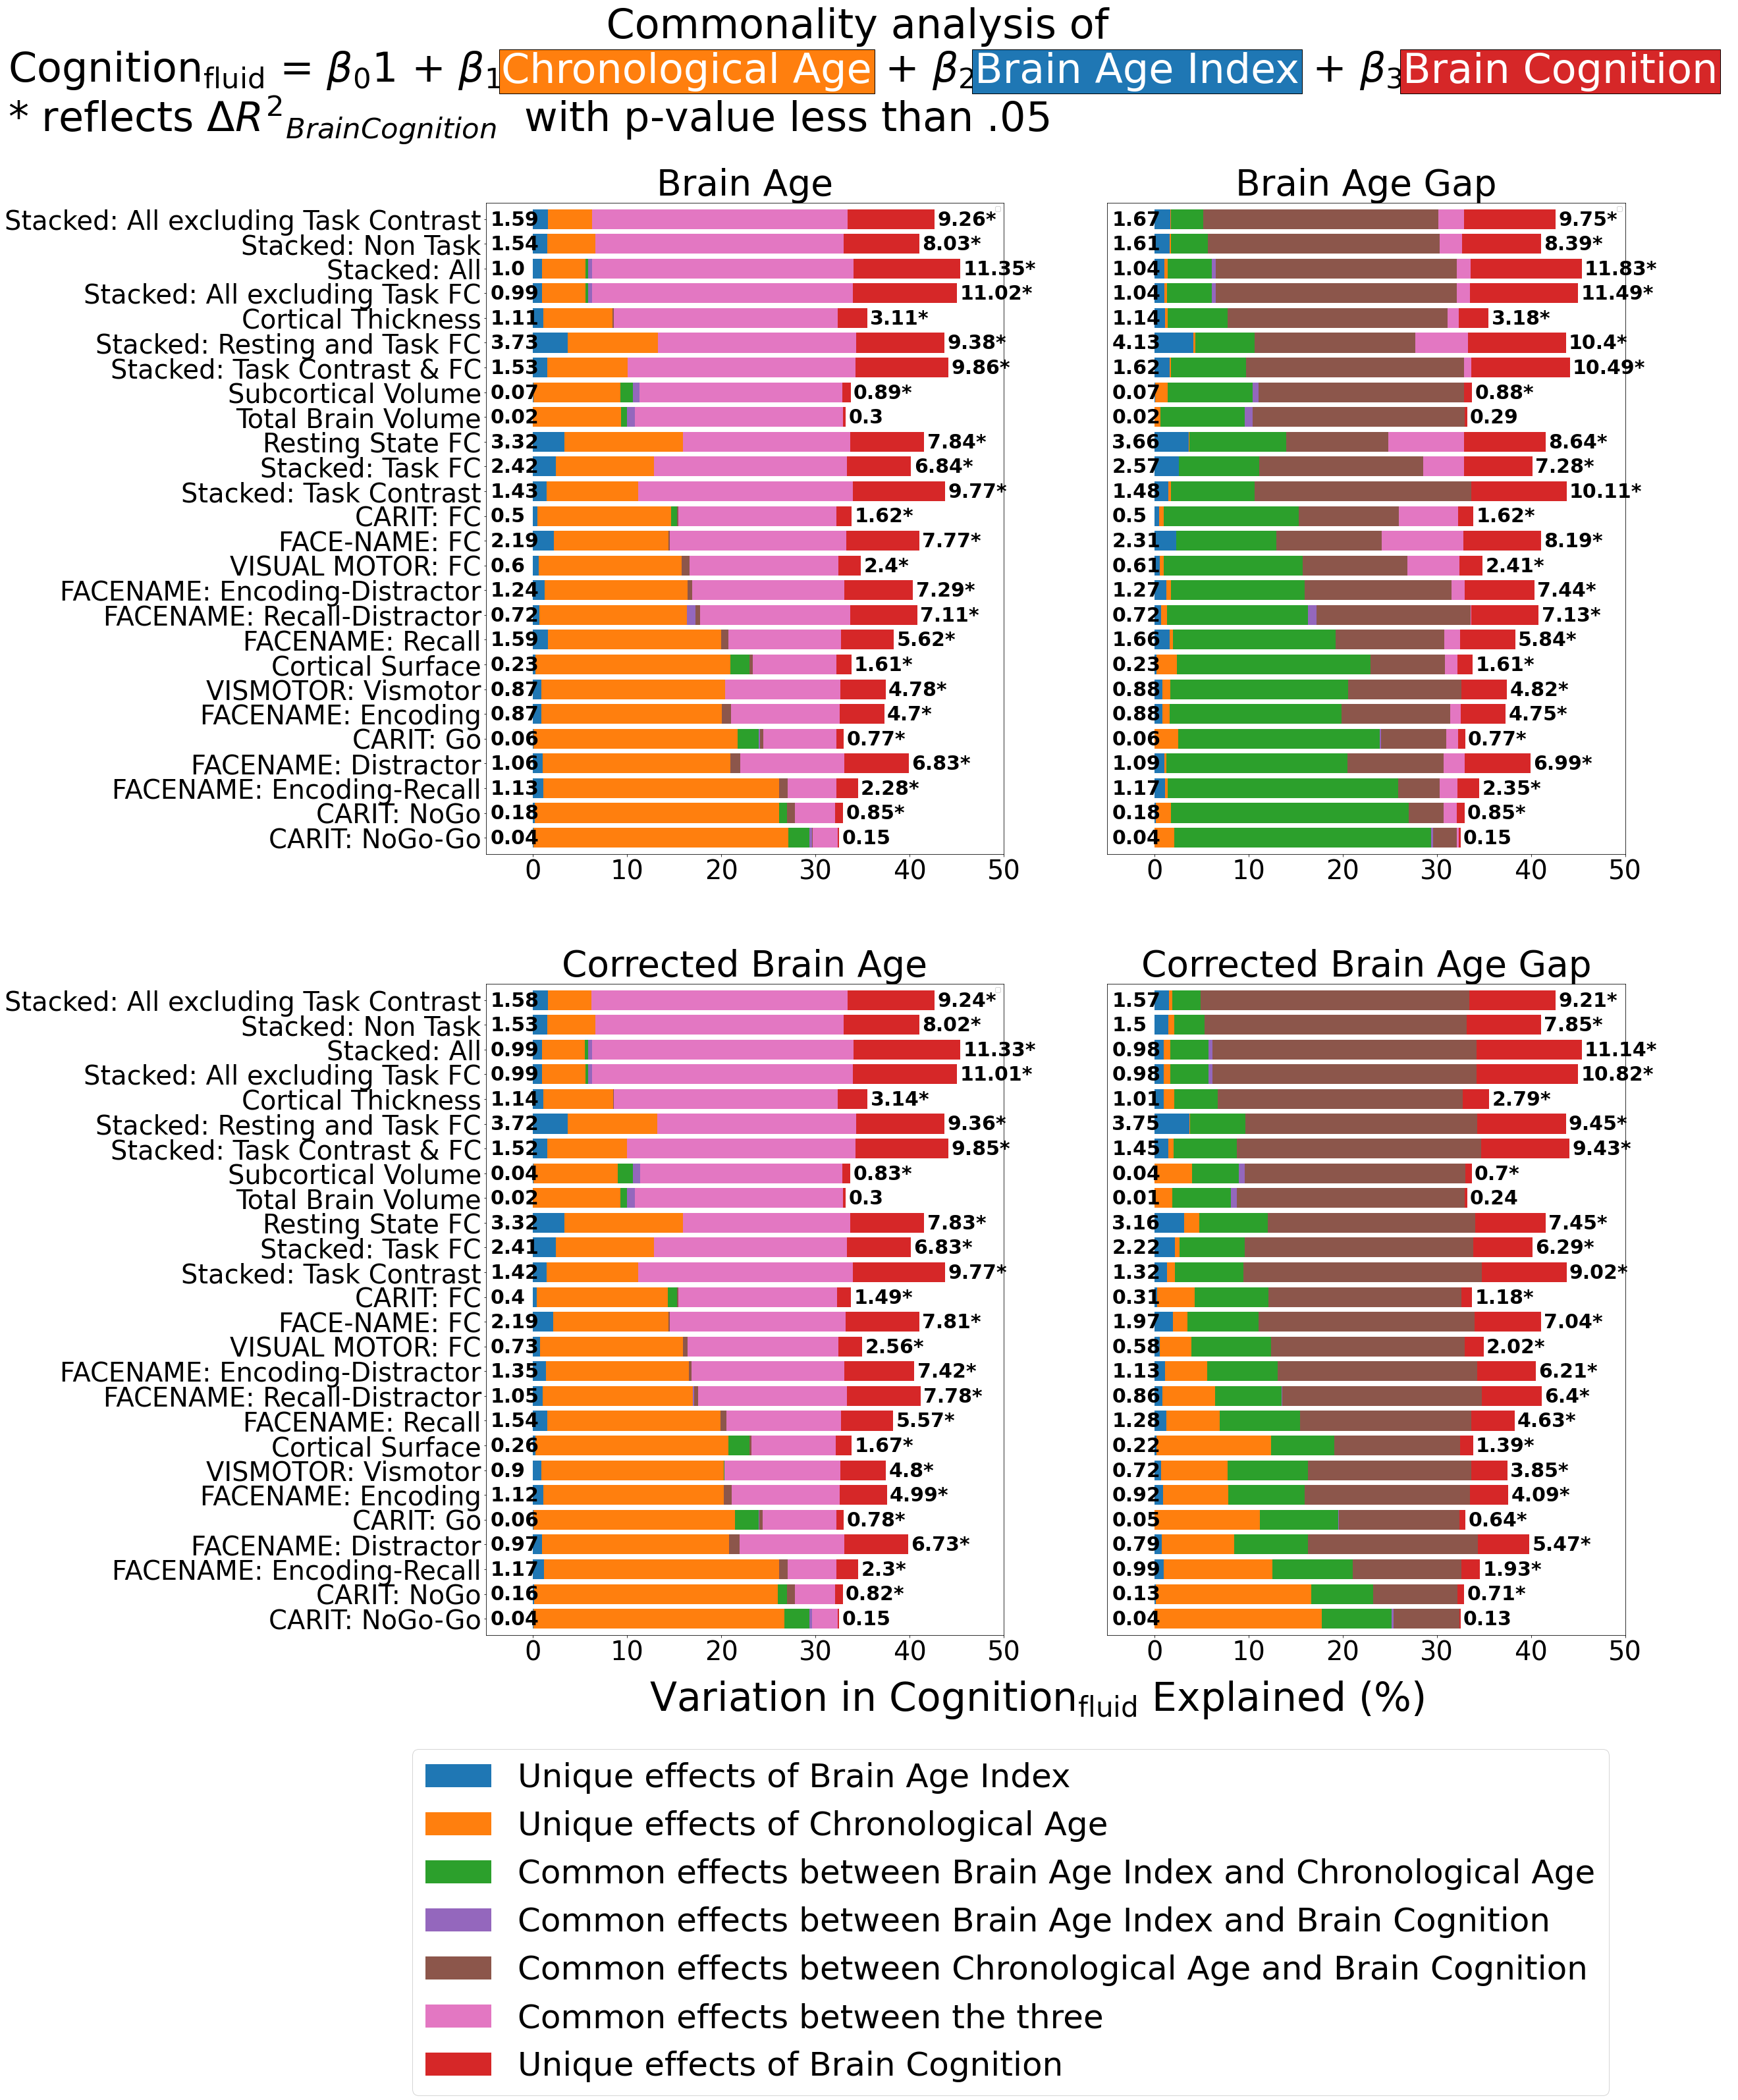

In [38]:

fig, axes = plt.subplots(nrows=2, ncols=2)

fig.set_size_inches(40, 40)

for ttype, num, title, num1, num2 in zip(['age_pred', 'age_gap', 'age_pred_cor', 'age_gap_cor'],
                      [0, 1, 2, 3],
                      ['Brain Age', 
                       'Brain Age Gap', 
                       'Corrected Brain Age', 
                       'Corrected Brain Age Gap'],
                        [0,0,1,1],
                        [0,1,0,1]):
    
    
    proc_df = df.loc[ df_scatter['index'].values, ['r2_3_'+ttype+'+age+cog-pred',
                         'U_3_'+ttype,
                         'U_3_age-orig_('+ttype+')',
                         
                         'C_3_2_'+ttype+'+age-orig',
                         'C_3_2_'+ttype+'+cog-pred',
                         'C_3_2_age-orig+cog-pred_('+ttype+')',
                         'C_3_'+ttype+'+age+cog-pred',
                         'U_3_cog-pred_('+ttype+')',]]

    proc_df[proc_df < 0] = 0

    for ind in proc_df.index:
        sums = proc_df.loc[ind, proc_df.columns[1:]].sum()
        for col in proc_df.columns[1:]:
            proc_df.loc[ind, col] = (proc_df.loc[ind, col]/sums)*proc_df.loc[ind, 'r2_3_'+ttype+'+age+cog-pred']  

    proc_df = proc_df.drop('r2_3_'+ttype+'+age+cog-pred', axis=1)

    proc_df = proc_df*100

    
    table = proc_df
    

    table2 = df_d_r2_23_nn.reindex(index=table.index)
    
    
    ax1 = table.plot.barh(width=0.8,
                     stacked=True, 
                     figsize=(31,40), 
                     fontsize=40,
                     ax=axes[num1,num2],
                     color=['#1f77b4', '#ff7f0e',  '#2ca02c', '#9467bd', '#8c564b', '#e377c2','#d62728',])
    #set title
    ax1.set_title(title, fontsize=55)
    
    #set bar number text
    j=0
    coord = pd.Series(table2.index,
                      index=np.arange(156,156+len(ax1.patches[156:]),1))
    for i in ax1.patches:
        if j<26:
            xm = -4.5
            cc ='black'
            rnd = 2
            xtxt = str(round((i.get_width()), rnd)) 
            
            ax1.text(xm, i.get_y()+0.15,
                     xtxt,
                     fontsize=30, fontweight='bold',
                     color=cc)
        if j>=156:
            xm = i.get_x()+i.get_width()+0.3
            cc ='black'
            rnd = 2
            if table2.loc[coord[j], ttype]!=0 :
                xtxt = str(round((i.get_width()), rnd))+'*'    
            else:
                xtxt = str(round((i.get_width()), rnd))

            ax1.text(xm, i.get_y()+0.15,
                     xtxt,
                     fontsize=30, fontweight='bold',
                     color=cc)
        j+=1
    
    
    
    #set legend position
    if num ==3:
        ax1.legend(['Unique effects of Brain Age Index', 
                    'Unique effects of Chronological Age',
                    'Common effects between Brain Age Index and Chronological Age',
                    'Common effects between Brain Age Index and Brain Cognition',
                    'Common effects between Chronological Age and Brain Cognition',
                    'Common effects between the three',
                    'Unique effects of Brain Cognition'],
                   bbox_to_anchor=(1, -0.15), 
                   fontsize=50, ncol=1)  
    else:
        ax1.legend([])
    
    
    #set Y ticks 
    if num == 1:
        ax1.set_yticks([])
    elif num == 3:
        ax1.set_yticks([])
    
            
    ax1.set_xlim((-4.99,50))    
        
        
#fig.tight_layout()
sx = '                                              Commonality analysis of\n$\mathregular{Cognition_{fluid}}$ = $\u03B2_{0}$1 + $\u03B2_{1}$<Chronological Age> + $\u03B2_{2}$<Brain Age Index> + $\u03B2_{3}$<Brain Cognition> \n* reflects \u0394$R^2$$_{Brain Cognition}$  with p-value less than .05'

highlight_textprops = [{"bbox": {"facecolor": "#ff7f0e"}, "color":'w'}, 
                       {"bbox": {"facecolor": "#1f77b4"}, "color":'w'},
                       {"bbox": {"facecolor": "#d62728"}, "color":'w'}]
fig_text(x=-0.2, y=0.91, va='bottom', s=sx,  highlight_textprops= highlight_textprops, fontsize=62)

fig.supxlabel('Variation in $\mathregular{Cognition_{fluid}}$ Explained (%)', fontsize=60, y=0.08)

plt.show()